# Description
This notebook is designed as an extension to the work done in CommonAnalysis.ipynb.
Specifically, per course requirements, the extension Plan will required me to ask a human 
centered data science question that extends the work in Course Project Part 1 - Common Analysis. 

Therefore, the human centered data science question that I ended up asking/answering is:
"What impacts does wildfire smoke have on the healthcare industry in Leavenworth, Kansas?"

The end goal of answering the proposed human centered data science question is to use analysis to craft a policy
recommendation for the city council of Leavenworth.
# -------------------------------------------------------------------------------------------

# Policy recommendation
#### Given the analysis findings, 
##### 1. There is no need for the city to take drastic actions against wildfire smoke yet.
##### 2. I recommend the city should, however, continue to closely monitor the volume of wildfiresmoke received so that they can make better informed decisions in the future.
##### 3. Stay at home recommendations should be issued when the Air Quality Index (AQI) is at unhealthy levels.
##### 4. Try to increase public awareness of the dangers of inhaling wildfire smoke.
##### 5. Consider subsidizing the healthcare industry to combating the declining workforce.

# -------------------------------------------------------------------------------------------
# Why did you make this policy recommendation?
```
There are three main reasons I made this policy recommendation.
1. The Health care industry is going to have their work cut out for them in the future due to an increasing population,
   increasing old age depedency ratio, and decreasing number of healthcare workers.
2. The amount of wildfire smoke Leavenworth receives is increasing, and it's AQI levels are going up. 
   (See CommonAnalysis.ipynb)
3. Long term exposure to wildfire smoke exacerbates health issues. Thus, the increasing smoke will lead to increased
   Emergency Department (ED) visits, which in turn costs extra money.
```

# Implications of more ED visits:
1. Less healthcare workers to keep up with the increasing number of ED visits will lead to lower standards of care.
2. More money spent + less insurance = potential economic issues.

# -------------------------------------------------------------------------------------------

# Notes: 

## See ../Reports/ExtensionPlanReport.pdf
This file outlines the initial plan I had for extending the work of CommonAnalysis.ipynb. However, as you may notice,
this work ends up slightly deviating from that original plan due to the fact that the specific data and facts I were looking for were not available. Therefore, I ended up going with a more generic approach (Looking at general population trends).

# Imports

In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm

# Read in census data
# -------------------------------------------------------------------------------------------
Data description
```
This work utilized United States census data, which can be found at https://data.census.gov/. United States census data is quite vast and can include many different schemas which cannot be fully described here. For this work specifically, population estimates, age estimates, healthcare coverage estimates, and employment by industry estimates were used. 

Data downloaded has three files per year, below are some examples:
1. ACSST5Y2010.20101-Column-Metadata.csv - Describes what each column in the Data file stands for
2. ACSST5Y2010.20101-Data.csv            - The quantitative data we use in our analyses
3. ACSST5Y2010.20101-Table-Notes.txt     - Extra metadata describing how certain fields were calculated, 
                                           how estimates were made, etc.
```
# -------------------------------------------------------------------------------------------
How data is to be read in
```
In the case of this work, we read in csv files through Pandas, where the header row is automatically inferred. 
Specifically, for each census file its associated Column-Metadata.csv file was looked at to determine which data
we wanted to work with in this notebook. From there, we would load all of the information we wanted to keep into a dictionary, where the key was the year and the value was a dictionary of everything we wanted to keep. One major issue that 
came up was that metadata formats changed at times. However, these relevant changes are documented in the markdown cell above each set of files worked with. 
```

#### Age demographics per year from 2010-2021
Codes:  
S0101_C01_001E - Total population estimate  
S0101_C01_002E - Age under 5 estimate  
S0101_C01_003E - Age 5 to 9 estimate  
S0101_C01_004E - Age 10 to 14 estimate  
S0101_C01_005E - Age 15 to 19 estimate  
S0101_C01_006E - 20 to 24  
S0101_C01_007E - 25 to 29  
S0101_C01_008E - 30 to 34  
S0101_C01_009E - 35 to 39  
S0101_C01_010E - 40 to 44  
S0101_C01_011E - 45 to 49  
S0101_C01_012E - 50 to 54  
S0101_C01_013E - 55 to 59  
S0101_C01_014E - 60 to 64  
S0101_C01_015E - 65 to 69  
S0101_C01_016E - 70 to 74  
S0101_C01_017E - 75 to 79  
S0101_C01_018E - 80 to 84  
S0101_C01_019E - 85+  
S0101_C01_032E - Age depedency ratio

2010 Old age dpe S0101_C01_033E
 2021 old age dpe S0101_C01_035E
   
    if(year < 2017):
        results["Age_dependency_ratio"] = float(testdf['S0101_C01_032E'][1])
        results["Old_Age_dependency_ratio"] = float(testdf['S0101_C01_033E'][1])
    if(year >= 2017):
        results["Age_dependency_ratio"] = float(testdf['S0101_C01_034E'][1])
        results["Old_Age_dependency_ratio"] = float(testdf['S0101_C01_035E'][1])
    return results


In [2]:
def getColumnValueFromFile(filepath, column):
    """
    Description:
        Reads in census data files and parses out a particular field
    Inputs:
        filepath - String - Location of file
    Outputs:
        Value at column... Could be a string/float/int/etc
    """
    testdf = pd.read_csv(filepath)
    return testdf[column][1]

#def getAgeInformation(filepath, year):
#    """
#    Description:
#        Reads in census data age files and parses out particular fields we care about.
#        See above markdown cell for code information.
#    Inputs:
#        filepath - String - Location of file
#    Outputs:
#        Dictionary
#    """
#    results = {}
#    testdf = pd.read_csv(filepath)
#    Total_pop_estimate = float(testdf['S0101_C01_001E'][1])
#    results["Total_pop_estimate"] = Total_pop_estimate
#    results["Pop_estimate_0to5"] = float(testdf['S0101_C01_002E'][1]) * Total_pop_estimate/100
#    results["Pop_estimate_5to9"] = float(testdf['S0101_C01_003E'][1]) * Total_pop_estimate/100
#    results["Pop_estimate_10to14"] = float(testdf['S0101_C01_004E'][1]) * Total_pop_estimate/100
#    results["Pop_estimate_15to19"] = float(testdf['S0101_C01_005E'][1]) * Total_pop_estimate/100
#    results["Pop_estimate_20to24"] = float(testdf['S0101_C01_006E'][1]) * Total_pop_estimate/100
#    results["Pop_estimate_25to29"] = float(testdf['S0101_C01_007E'][1]) * Total_pop_estimate/100
#    results["Pop_estimate_30to34"] = float(testdf['S0101_C01_008E'][1]) * Total_pop_estimate/100
#    results["Pop_estimate_35to39"] = float(testdf['S0101_C01_009E'][1]) * Total_pop_estimate/100
#    results["Pop_estimate_40to44"] = float(testdf['S0101_C01_010E'][1]) * Total_pop_estimate/100
#    results["Pop_estimate_45to49"] = float(testdf['S0101_C01_011E'][1]) * Total_pop_estimate/100
#    results["Pop_estimate_50to54"] = float(testdf['S0101_C01_012E'][1]) * Total_pop_estimate/100
#    results["Pop_estimate_55to59"] = float(testdf['S0101_C01_013E'][1]) * Total_pop_estimate/100
#    results["Pop_estimate_60to64"] = float(testdf['S0101_C01_014E'][1]) * Total_pop_estimate/100
#    results["Pop_estimate_65to69"] = float(testdf['S0101_C01_015E'][1]) * Total_pop_estimate/100
#    results["Pop_estimate_70to74"] = float(testdf['S0101_C01_016E'][1]) * Total_pop_estimate/100
#    results["Pop_estimate_75to79"] = float(testdf['S0101_C01_017E'][1]) * Total_pop_estimate/100
#    results["Pop_estimate_80to84"] = float(testdf['S0101_C01_018E'][1]) * Total_pop_estimate/100
#    results["Pop_estimate_85toINF"] = float(testdf['S0101_C01_019E'][1]) * Total_pop_estimate/100
#    
#    # 2010 Old age dpe S0101_C01_033E
#    # 2021 old age dpe S0101_C01_035E
#    
#    if(year < 2017):
#        results["Age_dependency_ratio"] = float(testdf['S0101_C01_032E'][1])
#        results["Old_Age_dependency_ratio"] = float(testdf['S0101_C01_033E'][1])
#    if(year >= 2017):
#        results["Age_dependency_ratio"] = float(testdf['S0101_C01_034E'][1])
#        results["Old_Age_dependency_ratio"] = float(testdf['S0101_C01_035E'][1])
#    return results

# Get total population estimates
population_sizes = {
    2010 : getColumnValueFromFile("../Data/AgeAndSex/ACSST5Y2010.S0101-Data.csv", 'S0101_C01_001E'),
    2011 : getColumnValueFromFile("../Data/AgeAndSex/ACSST5Y2011.S0101-Data.csv", 'S0101_C01_001E'),
    2012 : getColumnValueFromFile("../Data/AgeAndSex/ACSST5Y2012.S0101-Data.csv", 'S0101_C01_001E'),
    2013 : getColumnValueFromFile("../Data/AgeAndSex/ACSST5Y2013.S0101-Data.csv", 'S0101_C01_001E'),
    2014 : getColumnValueFromFile("../Data/AgeAndSex/ACSST5Y2014.S0101-Data.csv", 'S0101_C01_001E'),
    2015 : getColumnValueFromFile("../Data/AgeAndSex/ACSST5Y2015.S0101-Data.csv", 'S0101_C01_001E'),
    2016 : getColumnValueFromFile("../Data/AgeAndSex/ACSST5Y2016.S0101-Data.csv", 'S0101_C01_001E'),
    2017 : getColumnValueFromFile("../Data/AgeAndSex/ACSST5Y2017.S0101-Data.csv", 'S0101_C01_001E'),
    2018 : getColumnValueFromFile("../Data/AgeAndSex/ACSST5Y2018.S0101-Data.csv", 'S0101_C01_001E'),
    2019 : getColumnValueFromFile("../Data/AgeAndSex/ACSST5Y2019.S0101-Data.csv", 'S0101_C01_001E'),
    2020 : getColumnValueFromFile("../Data/AgeAndSex/ACSST5Y2020.S0101-Data.csv", 'S0101_C01_001E'),
    2021 : getColumnValueFromFile("../Data/AgeAndSex/ACSST5Y2021.S0101-Data.csv", 'S0101_C01_001E')
}
print(population_sizes)

# Get old age depedency ratio estimates
old_age_dependency_ratios = {
    2010 : getColumnValueFromFile("../Data/AgeAndSex/ACSST5Y2010.S0101-Data.csv", 'S0101_C01_033E'),
    2011 : getColumnValueFromFile("../Data/AgeAndSex/ACSST5Y2011.S0101-Data.csv", 'S0101_C01_033E'),
    2012 : getColumnValueFromFile("../Data/AgeAndSex/ACSST5Y2012.S0101-Data.csv", 'S0101_C01_033E'),
    2013 : getColumnValueFromFile("../Data/AgeAndSex/ACSST5Y2013.S0101-Data.csv", 'S0101_C01_033E'),
    2014 : getColumnValueFromFile("../Data/AgeAndSex/ACSST5Y2014.S0101-Data.csv", 'S0101_C01_033E'),
    2015 : getColumnValueFromFile("../Data/AgeAndSex/ACSST5Y2015.S0101-Data.csv", 'S0101_C01_033E'),
    2016 : getColumnValueFromFile("../Data/AgeAndSex/ACSST5Y2016.S0101-Data.csv", 'S0101_C01_033E'),
    2017 : getColumnValueFromFile("../Data/AgeAndSex/ACSST5Y2017.S0101-Data.csv", 'S0101_C01_035E'), #Change in metadata
    2018 : getColumnValueFromFile("../Data/AgeAndSex/ACSST5Y2018.S0101-Data.csv", 'S0101_C01_035E'),
    2019 : getColumnValueFromFile("../Data/AgeAndSex/ACSST5Y2019.S0101-Data.csv", 'S0101_C01_035E'),
    2020 : getColumnValueFromFile("../Data/AgeAndSex/ACSST5Y2020.S0101-Data.csv", 'S0101_C01_035E'),
    2021 : getColumnValueFromFile("../Data/AgeAndSex/ACSST5Y2021.S0101-Data.csv", 'S0101_C01_035E')
}

{2010: '35174', 2011: '35300', 2012: '35434', 2013: '35586', 2014: '35738', 2015: '35861', 2016: '35948', 2017: '35958', 2018: '36008', 2019: '36064', 2020: '36129', 2021: '37216'}


#### Industry by employed civilian over 16
Codes: 
S2407_C01_001E - Total estimate civilian employed population 16+  
S2407_C01_011E - Total estimate Educational/Healthcare/social workers

In [3]:
# Get total number of employees
total_employed_estimates = {
    2010 :  getColumnValueFromFile("../Data/IndustryByClassCivilianEmployedOver16/ACSST5Y2010.S2407-Data.csv", "S2407_C01_001E"),
    2011 :  getColumnValueFromFile("../Data/IndustryByClassCivilianEmployedOver16/ACSST5Y2011.S2407-Data.csv", "S2407_C01_001E"),
    2012 :  getColumnValueFromFile("../Data/IndustryByClassCivilianEmployedOver16/ACSST5Y2012.S2407-Data.csv", "S2407_C01_001E"),
    2013 :  getColumnValueFromFile("../Data/IndustryByClassCivilianEmployedOver16/ACSST5Y2013.S2407-Data.csv", "S2407_C01_001E"),
    2014 :  getColumnValueFromFile("../Data/IndustryByClassCivilianEmployedOver16/ACSST5Y2014.S2407-Data.csv", "S2407_C01_001E"),
    2015 :  getColumnValueFromFile("../Data/IndustryByClassCivilianEmployedOver16/ACSST5Y2015.S2407-Data.csv", "S2407_C01_001E"),
    2016 :  getColumnValueFromFile("../Data/IndustryByClassCivilianEmployedOver16/ACSST5Y2016.S2407-Data.csv", "S2407_C01_001E"),
    2017 :  getColumnValueFromFile("../Data/IndustryByClassCivilianEmployedOver16/ACSST5Y2017.S2407-Data.csv", "S2407_C01_001E"),
    2018 :  getColumnValueFromFile("../Data/IndustryByClassCivilianEmployedOver16/ACSST5Y2018.S2407-Data.csv", "S2407_C01_001E"),
    2019 :  getColumnValueFromFile("../Data/IndustryByClassCivilianEmployedOver16/ACSST5Y2019.S2407-Data.csv", "S2407_C01_001E"),
    2020 :  getColumnValueFromFile("../Data/IndustryByClassCivilianEmployedOver16/ACSST5Y2020.S2407-Data.csv", "S2407_C01_001E"),
    2021 :  getColumnValueFromFile("../Data/IndustryByClassCivilianEmployedOver16/ACSST5Y2021.S2407-Data.csv", "S2407_C01_001E")
}

# Get healthcare/education/social worker counts
total_hes_workers_estimates = {
    2010 :  getColumnValueFromFile("../Data/IndustryByClassCivilianEmployedOver16/ACSST5Y2010.S2407-Data.csv", "S2407_C01_011E"),
    2011 :  getColumnValueFromFile("../Data/IndustryByClassCivilianEmployedOver16/ACSST5Y2011.S2407-Data.csv", "S2407_C01_011E"),
    2012 :  getColumnValueFromFile("../Data/IndustryByClassCivilianEmployedOver16/ACSST5Y2012.S2407-Data.csv", "S2407_C01_011E"),
    2013 :  getColumnValueFromFile("../Data/IndustryByClassCivilianEmployedOver16/ACSST5Y2013.S2407-Data.csv", "S2407_C01_011E"),
    2014 :  getColumnValueFromFile("../Data/IndustryByClassCivilianEmployedOver16/ACSST5Y2014.S2407-Data.csv", "S2407_C01_011E"),
    2015 :  getColumnValueFromFile("../Data/IndustryByClassCivilianEmployedOver16/ACSST5Y2015.S2407-Data.csv", "S2407_C01_011E"),
    2016 :  getColumnValueFromFile("../Data/IndustryByClassCivilianEmployedOver16/ACSST5Y2016.S2407-Data.csv", "S2407_C01_011E"),
    2017 :  getColumnValueFromFile("../Data/IndustryByClassCivilianEmployedOver16/ACSST5Y2017.S2407-Data.csv", "S2407_C01_011E"),
    2018 :  getColumnValueFromFile("../Data/IndustryByClassCivilianEmployedOver16/ACSST5Y2018.S2407-Data.csv", "S2407_C01_011E"),
    2019 :  getColumnValueFromFile("../Data/IndustryByClassCivilianEmployedOver16/ACSST5Y2019.S2407-Data.csv", "S2407_C01_011E"),
    2020 :  getColumnValueFromFile("../Data/IndustryByClassCivilianEmployedOver16/ACSST5Y2020.S2407-Data.csv", "S2407_C01_011E"),
    2021 :  getColumnValueFromFile("../Data/IndustryByClassCivilianEmployedOver16/ACSST5Y2021.S2407-Data.csv", "S2407_C01_011E")
}

#def getEmploymentInformation(filepath):
#    """
#    Description:
#        Reads in census data employment files and parses out particular fields we care about.
#        See above markdown cell for code information.
#    Inputs:
#        filepath - String - Location of file
#    Outputs:
#        Dictionary
#    """
#    results = {}
#    testdf = pd.read_csv(filepath)
#    Total_pop_estimate = float(testdf['S2407_C01_001E'][1])
#    results["Total_estimate_employed"] = Total_pop_estimate
#    results["Employed_estimate_healthcare_education_socialworkers"] = float(testdf['S2407_C01_011E'][1])
#    return results
#
#EmploymentInfo = {
#    "2010" :  getEmploymentInformation("../Data/IndustryByClassCivilianEmployedOver16/ACSST5Y2010.S2407-Data.csv"),
#    "2011" :  getEmploymentInformation("../Data/IndustryByClassCivilianEmployedOver16/ACSST5Y2011.S2407-Data.csv"),
#    "2012" :  getEmploymentInformation("../Data/IndustryByClassCivilianEmployedOver16/ACSST5Y2012.S2407-Data.csv"),
#    "2013" :  getEmploymentInformation("../Data/IndustryByClassCivilianEmployedOver16/ACSST5Y2013.S2407-Data.csv"),
#    "2014" :  getEmploymentInformation("../Data/IndustryByClassCivilianEmployedOver16/ACSST5Y2014.S2407-Data.csv"),
#    "2015" :  getEmploymentInformation("../Data/IndustryByClassCivilianEmployedOver16/ACSST5Y2015.S2407-Data.csv"),
#    "2016" :  getEmploymentInformation("../Data/IndustryByClassCivilianEmployedOver16/ACSST5Y2016.S2407-Data.csv"),
#    "2017" :  getEmploymentInformation("../Data/IndustryByClassCivilianEmployedOver16/ACSST5Y2017.S2407-Data.csv"),
#    "2018" :  getEmploymentInformation("../Data/IndustryByClassCivilianEmployedOver16/ACSST5Y2018.S2407-Data.csv"),
#    "2019" :  getEmploymentInformation("../Data/IndustryByClassCivilianEmployedOver16/ACSST5Y2019.S2407-Data.csv"),
#    "2020" :  getEmploymentInformation("../Data/IndustryByClassCivilianEmployedOver16/ACSST5Y2020.S2407-Data.csv"),
#    "2021" :  getEmploymentInformation("../Data/IndustryByClassCivilianEmployedOver16/ACSST5Y2021.S2407-Data.csv")
#}
#print(EmploymentInfo["2010"])

In [4]:
percent_population_uninsured = {
    "2012" :  getColumnValueFromFile("../Data/HealthInsuranceCoverage/ACSST5Y2012.S2701-Data.csv", 'S2701_C03_001E'),
    "2013" :  getColumnValueFromFile("../Data/HealthInsuranceCoverage/ACSST5Y2013.S2701-Data.csv", 'S2701_C03_001E'),
    "2014" :  getColumnValueFromFile("../Data/HealthInsuranceCoverage/ACSST5Y2014.S2701-Data.csv", 'S2701_C03_001E'),
    "2015" :  getColumnValueFromFile("../Data/HealthInsuranceCoverage/ACSST5Y2015.S2701-Data.csv", 'S2701_C05_001E'), #Change in metadata
    "2016" :  getColumnValueFromFile("../Data/HealthInsuranceCoverage/ACSST5Y2016.S2701-Data.csv", 'S2701_C05_001E'),
    "2017" :  getColumnValueFromFile("../Data/HealthInsuranceCoverage/ACSST5Y2017.S2701-Data.csv", 'S2701_C05_001E'),
    "2018" :  getColumnValueFromFile("../Data/HealthInsuranceCoverage/ACSST5Y2018.S2701-Data.csv", 'S2701_C05_001E'),
    "2019" :  getColumnValueFromFile("../Data/HealthInsuranceCoverage/ACSST5Y2019.S2701-Data.csv", 'S2701_C05_001E'),
    "2020" :  getColumnValueFromFile("../Data/HealthInsuranceCoverage/ACSST5Y2020.S2701-Data.csv", 'S2701_C05_001E'),
    "2021" :  getColumnValueFromFile("../Data/HealthInsuranceCoverage/ACSST5Y2021.S2701-Data.csv", 'S2701_C05_001E')
}

#def getHealthInsuranceInformation2012to2014(filepath):
#    """
#    Description:
#        Reads in census data health insurance coverage files and parses out particular fields we care about.
#        See above markdown cell for code information.
#    Inputs:
#        filepath - String - Location of file
#    Outputs:
#        Dictionary
#    """
#    results = {}
#    testdf = pd.read_csv(filepath)
#    results["Percent_uninsured"] = float(testdf['S2701_C03_001E'][1])
#    results["Number_uninsured"] = float(testdf['S2701_C02_001E'][1])
#    return results
#
#def getHealthInsuranceInformation2015to2021(filepath):
#    """
#    Description:
#        Reads in census data health insurance coverage files and parses out particular fields we care about.
#        See above markdown cell for code information.
#    Inputs:
#        filepath - String - Location of file
#    Outputs:
#        Dictionary
#    """
#    results = {}
#    testdf = pd.read_csv(filepath)
#    results["Percent_uninsured"] = float(testdf['S2701_C05_001E'][1])
#    results["Number_uninsured"] = float(testdf['S2701_C04_001E'][1])
#    return results
#
##Data format changes in 2015....
#HealthInsuranceCoverageInfo = {
#    "2012" :  getHealthInsuranceInformation2012to2014("../Data/HealthInsuranceCoverage/ACSST5Y2012.S2701-Data.csv"),
#    "2013" :  getHealthInsuranceInformation2012to2014("../Data/HealthInsuranceCoverage/ACSST5Y2013.S2701-Data.csv"),
#    "2014" :  getHealthInsuranceInformation2012to2014("../Data/HealthInsuranceCoverage/ACSST5Y2014.S2701-Data.csv"),
#    "2015" :  getHealthInsuranceInformation2015to2021("../Data/HealthInsuranceCoverage/ACSST5Y2015.S2701-Data.csv"),
#    "2016" :  getHealthInsuranceInformation2015to2021("../Data/HealthInsuranceCoverage/ACSST5Y2016.S2701-Data.csv"),
#    "2017" :  getHealthInsuranceInformation2015to2021("../Data/HealthInsuranceCoverage/ACSST5Y2017.S2701-Data.csv"),
#    "2018" :  getHealthInsuranceInformation2015to2021("../Data/HealthInsuranceCoverage/ACSST5Y2018.S2701-Data.csv"),
#    "2019" :  getHealthInsuranceInformation2015to2021("../Data/HealthInsuranceCoverage/ACSST5Y2019.S2701-Data.csv"),
#    "2020" :  getHealthInsuranceInformation2015to2021("../Data/HealthInsuranceCoverage/ACSST5Y2020.S2701-Data.csv"),
#    "2021" :  getHealthInsuranceInformation2015to2021("../Data/HealthInsuranceCoverage/ACSST5Y2021.S2701-Data.csv")
#}
#print(HealthInsuranceCoverageInfo["2012"])\

# Basic visualizations
In the cells below we are simply showing time-series graphs of various census data for Leavenworth Kansas.

# -------------------------------------------------------------------------------------------
Population over time 
```
Relevant to policy recommendation reason #1: 
    The Health care industry is going to have their work cut out for them in the future due to an increasing population,
    increasing old age depedency ratio, and decreasing number of healthcare workers.
```
# -------------------------------------------------------------------------------------------
Health care employment percentage to overall population
```
Relevant to policy recommendation reason #1: 
    The Health care industry is going to have their work cut out for them in the future due to an increasing population,
    increasing old age depedency ratio, and decreasing number of healthcare workers.
```
# -------------------------------------------------------------------------------------------
Age dependency ratio
```
Relevant to policy recommendation reason #1: 
    The Health care industry is going to have their work cut out for them in the future due to an increasing population,
    increasing old age depedency ratio, and decreasing number of healthcare workers.
```
# -------------------------------------------------------------------------------------------
Health insurance rates
```
Relevant to policy recommendation reason #3: 
    Long term exposure to wildfire smoke exacerbates health issues. Thus, the increasing smoke will lead to increased
    Emergency Department (ED) visits, which in turn costs extra money.
```
# -------------------------------------------------------------------------------------------

#### Population over time

Text(0, 0.5, 'Population count')

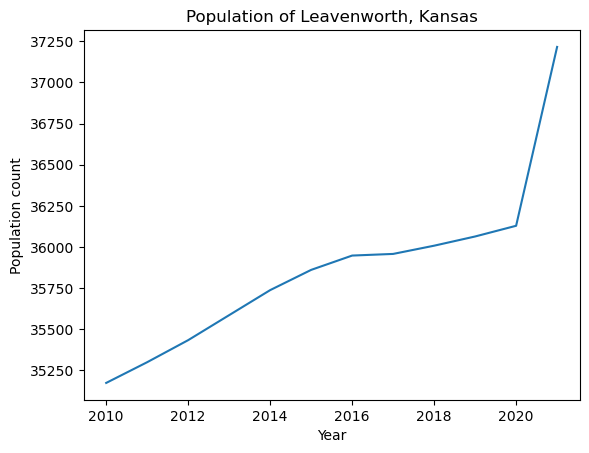

In [47]:
# Get data into format that is digestible by matplotlib
population_estimates = []
years = []
for year in population_sizes.keys():
    years.append(year)
    population_estimates.append(float(population_sizes[year]))

# Create plot
plt.plot(years, population_estimates)
plt.title("Population of Leavenworth, Kansas")
plt.xlabel("Year")
plt.ylabel("Population count")

#### Health care employment percentage to overal population

Text(0, 0.5, 'Population percentage')

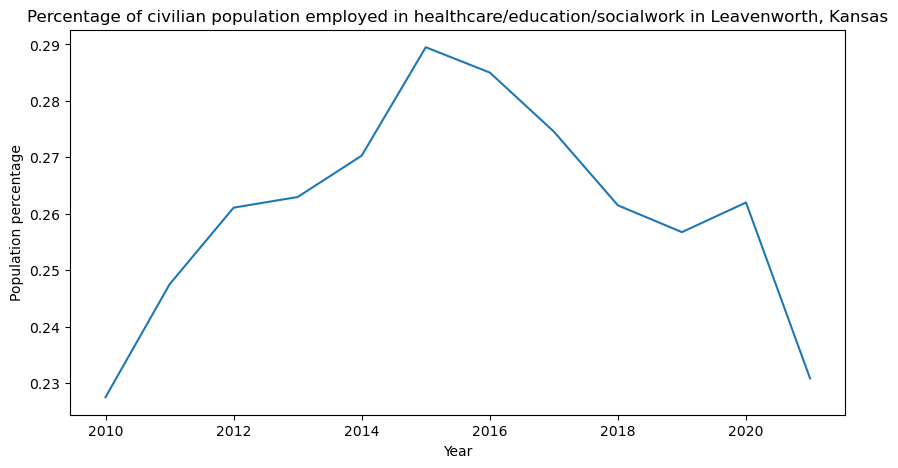

In [6]:
# Get data into format that is digestible by matplotlib
healthcare_employment_percentages = []
years = []
for year in total_employed_estimates.keys():
    years.append(year)
    healthcare_employment_percentages.append(float(total_hes_workers_estimates[year]) / float(total_employed_estimates[year]))

# Create plot
plt.figure(figsize=(10,5))
plt.plot(years, healthcare_employment_percentages)
plt.title("Percentage of civilian population employed in healthcare/education/socialwork in Leavenworth, Kansas")
plt.xlabel("Year")
plt.ylabel("Population percentage")

#### Age dependency ratio

Text(0, 0.5, 'Old age dependency ratio')

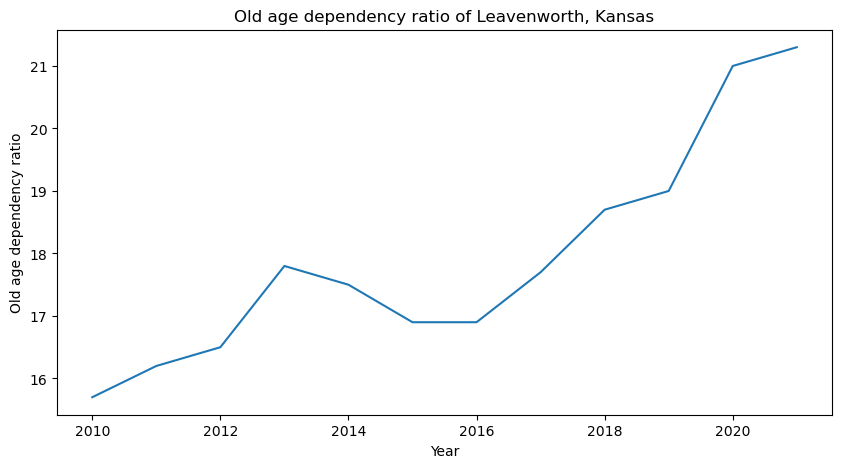

In [7]:
# Get information into format that is digestible by matplotlib
ADRs = []
years = []
for year in old_age_dependency_ratios.keys():
    years.append(year)
    ADRs.append(float(old_age_dependency_ratios[year]))

# Create plot
plt.figure(figsize=(10,5))
plt.plot(years, ADRs)
plt.title("Old age dependency ratio of Leavenworth, Kansas")
plt.xlabel("Year")
plt.ylabel("Old age dependency ratio")

#### Health insurance

Text(0, 0.5, 'Uninsured %')

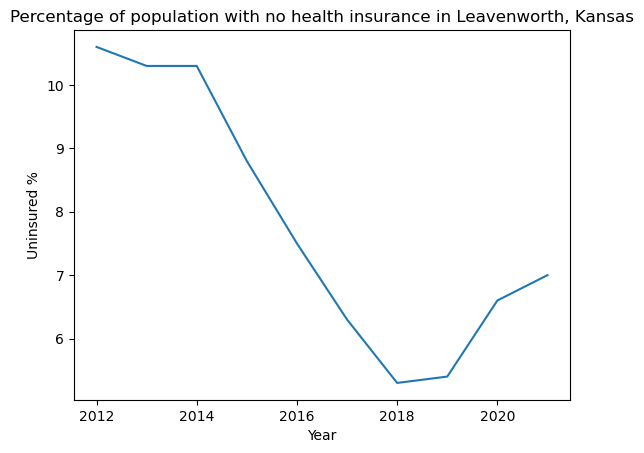

In [48]:
# Get information into format that is digestible by matplotlib
PercentUninsured = []
years = []
for year in percent_population_uninsured.keys():
    years.append(int(year))
    PercentUninsured.append(float(percent_population_uninsured[year]))

# Create plot
plt.plot(years, PercentUninsured)
plt.title("Percentage of population with no health insurance in Leavenworth, Kansas")
plt.xlabel("Year")
plt.ylabel("Uninsured %")

# Project leavenworth population to 2050 via line equation
```
In this cell, we are making a simple projection of the population of Leavenworth, Kansas.  
The way we are doing this is simply by creating a line equation given the data.
The form of such an equation is: 
    y = mx + b, where m is the slope and b the intercept.   
Thus, 
    Population = ((36129-35174)/12)x + 37216,
    Where:
        X = number of years after 2010    
        35174 = 2010 population
        36129 = 2020 population
        37216 = 2021 population
        11 = Number of full years passed between 2020 and 2010

    Note:
        We are ignoring 2021 population when considering the line equation in case since 
        it looks a bit anomalous in terms of relative change to previous years. 
```
##### Why use a line equation?
```
I decided to use a line equation here because it is simple. Additionally, without doing extra research there's no
point in throwing a complex prediction model at the problem, as we don't have extra data about Leavenworth
trends that could give us solid predictors of population growth. 

```

Text(0, 0.5, 'Population count')

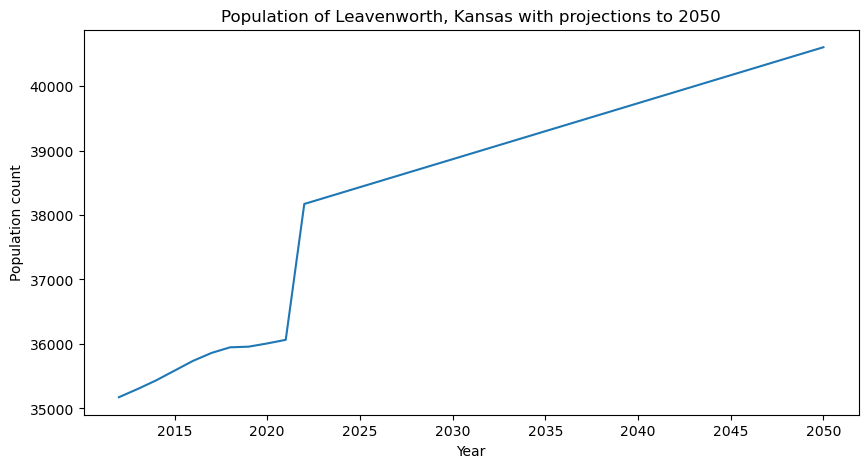

In [57]:
# Store the years 2012 - 2050
years_with_projections = []
for i in range(2012, 2051):
    years_with_projections.append(i)

# Get copy of current population estimates (2012-2022)
population_estimates_with_projections = []
for i in range(len(years)):
    population_estimates_with_projections.append(population_estimates[i])

# Get projected data by applying line equation, and project from 2023-2050
for i in range(11, 40):
    projected_pop = (((36129-35174)/11) * i) + 37216
    population_estimates_with_projections.append(projected_pop)

# Create plot
plt.figure(figsize=(10,5))
plt.plot(years_with_projections, population_estimates_with_projections)
plt.title("Population of Leavenworth, Kansas with projections to 2050")
plt.xlabel("Year")
plt.ylabel("Population count")

# Estimate Leavenworth population with relevant smoke-related health conditions based on national averages (Assuming AQI of 0)

#### Asthma
According to, https://www.cdc.gov/asthma/most_recent_national_asthma_data.htm 7.7% of people in the US had asthma in 2021.

In [10]:
AsthmaInfo = {}
for i in range(len(population_estimates_with_projections)):
    AsthmaInfo[2010+i] = population_estimates_with_projections[i] * 0.077
print(AsthmaInfo)

{2010: 2708.398, 2011: 2718.1, 2012: 2728.418, 2013: 2740.122, 2014: 2751.826, 2015: 2761.297, 2016: 2767.996, 2017: 2768.766, 2018: 2772.616, 2019: 2776.928, 2020: 2939.167, 2021: 2945.8520000000003, 2022: 2952.537, 2023: 2959.2219999999998, 2024: 2965.907, 2025: 2972.592, 2026: 2979.2769999999996, 2027: 2985.962, 2028: 2992.647, 2029: 2999.3320000000003, 2030: 3006.017, 2031: 3012.7019999999998, 2032: 3019.387, 2033: 3026.0719999999997, 2034: 3032.757, 2035: 3039.442, 2036: 3046.127, 2037: 3052.812, 2038: 3059.497, 2039: 3066.1820000000002, 2040: 3072.8669999999997, 2041: 3079.5519999999997, 2042: 3086.237, 2043: 3092.922, 2044: 3099.6069999999995, 2045: 3106.292, 2046: 3112.977, 2047: 3119.6620000000003, 2048: 3126.3469999999998}


#### Cardiovascular disease (CVD)
According to, https://professional.heart.org/-/media/PHD-Files-2/Science-News/2/2022-Heart-and-Stroke-Stat-Update/2022-Stat-Update-factsheet-GIobal-Burden-of-Disease.pdf 7534.1 per 100000 people have CVD.

In [11]:
CVDInfo = {}
for i in range(len(population_estimates_with_projections)):
    CVDInfo[2010+i] = (population_estimates_with_projections[i] * 7534.1) / 100000
print(CVDInfo)

{2010: 2650.044334, 2011: 2659.5373, 2012: 2669.632994, 2013: 2681.0848260000002, 2014: 2692.536658, 2015: 2701.803601, 2016: 2708.358268, 2017: 2709.111678, 2018: 2712.878728, 2019: 2717.0978240000004, 2020: 2875.841311, 2021: 2882.382279636364, 2022: 2888.923248272727, 2023: 2895.4642169090907, 2024: 2902.0051855454544, 2025: 2908.5461541818186, 2026: 2915.0871228181813, 2027: 2921.6280914545455, 2028: 2928.1690600909096, 2029: 2934.7100287272733, 2030: 2941.2509973636365, 2031: 2947.7919660000002, 2032: 2954.332934636364, 2033: 2960.873903272727, 2034: 2967.414871909091, 2035: 2973.9558405454545, 2036: 2980.496809181818, 2037: 2987.0377778181814, 2038: 2993.578746454545, 2039: 3000.1197150909097, 2040: 3006.660683727273, 2041: 3013.2016523636366, 2042: 3019.7426210000003, 2043: 3026.283589636364, 2044: 3032.8245582727272, 2045: 3039.365526909091, 2046: 3045.9064955454546, 2047: 3052.4474641818183, 2048: 3058.9884328181815}


#### Chronic Obstructive Pulmonary Disease (COPD)
According to https://www.cdc.gov/copd/basics-about.html#:~:text=Chronic%20lower%20respiratory%20disease%2C%20primarily,the%20United%20States%20in%202018.&text=Almost%2015.7%20million%20Americans%20, 6.4 percent of people have COPD circa 2018

In [12]:
COPDInfo = {}
for i in range(len(population_estimates_with_projections)):
    COPDInfo[2010+i] = population_estimates_with_projections[i] * 0.064
print(COPDInfo)

{2010: 2251.136, 2011: 2259.2000000000003, 2012: 2267.776, 2013: 2277.504, 2014: 2287.232, 2015: 2295.1040000000003, 2016: 2300.672, 2017: 2301.312, 2018: 2304.512, 2019: 2308.096, 2020: 2442.944, 2021: 2448.500363636364, 2022: 2454.056727272727, 2023: 2459.6130909090907, 2024: 2465.1694545454548, 2025: 2470.7258181818183, 2026: 2476.282181818182, 2027: 2481.8385454545455, 2028: 2487.394909090909, 2029: 2492.951272727273, 2030: 2498.5076363636363, 2031: 2504.064, 2032: 2509.620363636364, 2033: 2515.176727272727, 2034: 2520.733090909091, 2035: 2526.2894545454546, 2036: 2531.8458181818182, 2037: 2537.402181818182, 2038: 2542.9585454545454, 2039: 2548.5149090909094, 2040: 2554.0712727272726, 2041: 2559.627636363636, 2042: 2565.184, 2043: 2570.740363636364, 2044: 2576.296727272727, 2045: 2581.853090909091, 2046: 2587.4094545454545, 2047: 2592.9658181818186, 2048: 2598.5221818181817}


#### Heart attack (myocardial infarction - MI)
According to https://www.cdc.gov/heartdisease/facts.htm, 805k americans experience a heart attack per year.  
According to https://www.census.gov/library/stories/2022/12/happy-new-year-2023.html#:~:text=Related%20Statistics&text=The%20U.S.%20Census%20Bureau%20projects%20the%20U.S.%20population%20will%20be,1%2C%202022., the us population was 334,233,854 circa Jan 1, 2023. This means we will estimate that 805000/334,233,854 = 0.241% of people experience a heart attack per year

In [13]:
HeartAttackInfo = {}
for i in range(len(population_estimates_with_projections)):
    HeartAttackInfo[2010+i] = population_estimates_with_projections[i] * 0.00241
print(HeartAttackInfo)

{2010: 84.76934, 2011: 85.073, 2012: 85.39594, 2013: 85.76226, 2014: 86.12858, 2015: 86.42501, 2016: 86.63467999999999, 2017: 86.65878, 2018: 86.77928, 2019: 86.91423999999999, 2020: 91.99211, 2021: 92.20134181818182, 2022: 92.41057363636362, 2023: 92.61980545454544, 2024: 92.82903727272726, 2025: 93.0382690909091, 2026: 93.2475009090909, 2027: 93.45673272727272, 2028: 93.66596454545454, 2029: 93.87519636363636, 2030: 94.08442818181817, 2031: 94.29365999999999, 2032: 94.50289181818182, 2033: 94.71212363636361, 2034: 94.92135545454545, 2035: 95.13058727272727, 2036: 95.33981909090909, 2037: 95.5490509090909, 2038: 95.75828272727271, 2039: 95.96751454545453, 2040: 96.17674636363634, 2041: 96.38597818181817, 2042: 96.59521, 2043: 96.80444181818181, 2044: 97.01367363636362, 2045: 97.22290545454544, 2046: 97.43213727272726, 2047: 97.6413690909091, 2048: 97.8506009090909}


#### Stroke
According to https://www.cdc.gov/stroke/facts.htm, 795000 Americans experience a stroke per year
 This means we will estimate that 795000/334,233,854 = 0.237% of people experience a heart attack per year

In [14]:
StrokeInfo = {}
for i in range(len(population_estimates_with_projections)):
    StrokeInfo[2010+i] = population_estimates_with_projections[i] * 0.00237
print(StrokeInfo)

{2010: 83.36238, 2011: 83.661, 2012: 83.97858000000001, 2013: 84.33882, 2014: 84.69906, 2015: 84.99057, 2016: 85.19676000000001, 2017: 85.22046, 2018: 85.33896, 2019: 85.47168, 2020: 90.46527, 2021: 90.6710290909091, 2022: 90.87678818181818, 2023: 91.08254727272727, 2024: 91.28830636363637, 2025: 91.49406545454546, 2026: 91.69982454545455, 2027: 91.90558363636364, 2028: 92.11134272727274, 2029: 92.31710181818183, 2030: 92.52286090909091, 2031: 92.72862, 2032: 92.9343790909091, 2033: 93.14013818181817, 2034: 93.34589727272727, 2035: 93.55165636363637, 2036: 93.75741545454547, 2037: 93.96317454545455, 2038: 94.16893363636365, 2039: 94.37469272727273, 2040: 94.58045181818181, 2041: 94.78621090909091, 2042: 94.99197000000001, 2043: 95.1977290909091, 2044: 95.40348818181818, 2045: 95.60924727272727, 2046: 95.81500636363637, 2047: 96.02076545454547, 2048: 96.22652454545455}


# Get number of estimated ED visits using population counts
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8862306/ - Asthma is 1.3% of ED visits  
https://www.cdc.gov/mmwr/volumes/67/wr/mm6713a1.htm 9.9% of people with asthma visited ED  
https://www.cdc.gov/nchs/data/nhsr/nhsr174.pdf 11.4% ED visits from heart disease (CVD)    
https://journal.copdfoundation.org/jcopdf/id/1103/Characteristics-of-COPD-Patients-Using-United-States-Emergency-Care-or-Hospitalization#:~:text=Results%3A%20Among%20diagnosed%20COPD%20patients,hospitalization%20in%20the%20previous%20year. COPD patients 16.3% ED visit  
https://hcup-us.ahrq.gov/reports/statbriefs/sb47.pdf 0.6% of ED visits are for Heart attack, 0.6% are for stroke
https://www.cdc.gov/nchs/products/databriefs/db452.htm#:~:text=An%20estimated%20131%20million%20ED,with%20all%20other%20age%20groups. 40/100 people visit ED each year 

In [15]:
# General visits to ED each year is 40/100 people
ED_visits_no_smoke = {}
for i in range(len(population_estimates_with_projections)):
    year = 2010 + i
    total_ED_visits = population_estimates_with_projections[i] * 0.4
    ED_visits_no_smoke[year] = {
        "total" : total_ED_visits,
        "Asthma": total_ED_visits * 0.013,
        "CVD": total_ED_visits * 0.114,
        "COPD": COPDInfo[year] * 0.163,
        "Heart_attack": total_ED_visits * 0.061, #So we can see it on the plot...
        "Stroke": total_ED_visits * 0.06,
    }

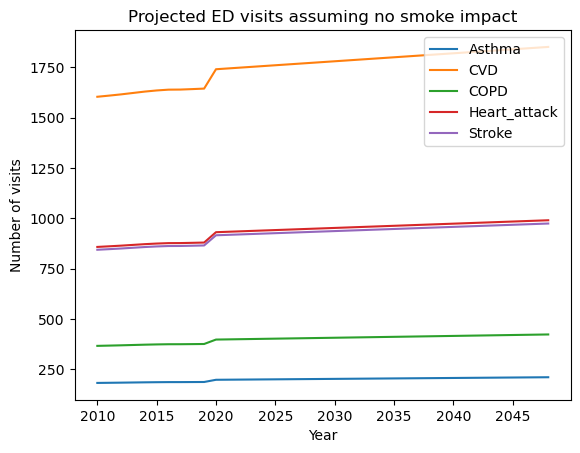

In [16]:
years = []
Totals = []
Asthma = []
CVD = []
COPD = []
Heart_attack = []
Stroke = []
for year in ED_visits_no_smoke.keys():
    years.append(year)
    Totals.append(ED_visits_no_smoke[year]["total"])
    Asthma.append(ED_visits_no_smoke[year]["Asthma"])
    CVD.append(ED_visits_no_smoke[year]["CVD"])
    COPD.append(ED_visits_no_smoke[year]["COPD"])
    Heart_attack.append(ED_visits_no_smoke[year]["Heart_attack"])
    Stroke.append(ED_visits_no_smoke[year]["Stroke"])

#plt.plot(years, Totals, label="Total")
plt.plot(years, Asthma, label="Asthma")
plt.plot(years, CVD, label="CVD")
plt.plot(years, COPD, label="COPD")
plt.plot(years, Heart_attack, label="Heart_attack")
plt.plot(years, Stroke, label="Stroke")
plt.title("Projected ED visits assuming no smoke impact")
plt.xlabel("Year")
plt.ylabel("Number of visits")
plt.legend()

# Get smoke estimates from previous notebook

In [17]:
with open('../Data/SmokeEstimates.json') as json_file:
    yearly_smoke_estimates = json.load(json_file)
print(yearly_smoke_estimates)

{'1963': 0.0007845067778975681, '1964': 0.0021635518913411113, '1965': 0.016998440407767827, '1966': 0.001709264752936373, '1967': 0.0007258876689639057, '1968': 0.00023524296902009573, '1969': 0.00042468012485909315, '1970': 0.01636269377142011, '1971': 0.004964268863689638, '1972': 0.0645188233004377, '1973': 0.0028017974332351986, '1974': 0.005278419103684302, '1975': 0.003068875009681437, '1976': 0.009844000320371735, '1977': 0.005877137870063218, '1978': 0.0028136060770111815, '1979': 0.004597308611750616, '1980': 0.00903175447855878, '1981': 0.00626256943128422, '1982': 0.002182304839698396, '1983': 0.003428670487791997, '1984': 0.05052999156470137, '1985': 0.023711393443061515, '1986': 0.3995515686962825, '1987': 6.747426608874581, '1988': 62.1655596660853, '1989': 0.6703940050932565, '1990': 0.5803287878283707, '1991': 13.852136642471152, '1992': 0.39384184550046947, '1993': 9.943104784949654, '1994': 20.334484426133606, '1995': 7.444358712848471, '1996': 53.120512342635934, '1

Text(0, 0.5, 'Smoke estimate')

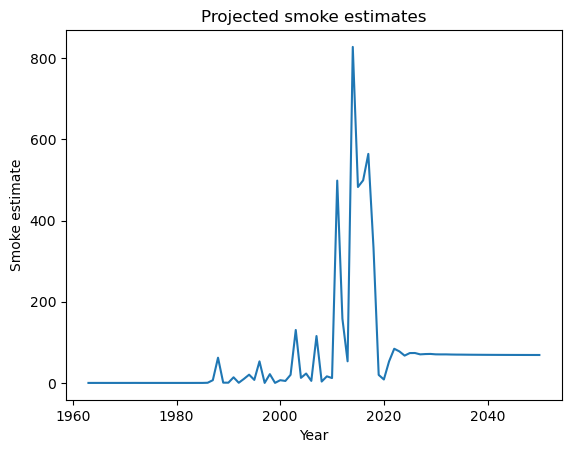

In [18]:
#Plot
years = []
Estimates = []
for year in yearly_smoke_estimates.keys():
    years.append(int(year))
    Estimates.append(yearly_smoke_estimates[year])

#plt.plot(years, Totals, label="Total")
plt.plot(years, Estimates)
plt.title("Projected smoke estimates")
plt.xlabel("Year")
plt.ylabel("Smoke estimate")
#plt.ticklabel_format(style='plain', useOffset=False, axis='x')

# Estimate increase in ED visits from the smoke information
Yearly smoke formula: Smoke_impact_from_fire = (area_forest_burned * 10 * 87.5) / (distance_from_city^5) To get the annual smoke estimate, we sum the smoke_impact_from_fire over every fire

Since we are unsure of the relative scale of our smoke estimate, we will simply use 1000 as the full multiplier from the studies and 0 as a 1.0 multiplier 

https://usafacts.org/articles/how-many-wildfires-occur-in-the-us/ 119 acres for avg fire  
https://www.healio.com/news/pulmonology/20231107/wildfire-pollution-linked-to-cardiopulmonary-ed-visits-among-vulnerable-populations#:~:text=Researchers%20found%20that%20with%20every,risk%20for%20cardiovascular%2Drelated%20ED general more volumetric based metric for increase  
https://www.pnas.org/doi/10.1073/pnas.2302409120#:~:text=In%20contrast%2C%20health%20outcomes%20with,increase%20by%2030%20to%20110%25. - 30-110% increase in asthma and COPD visits  
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6015400/ - CVD  
Stroke - also https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6015400/  
Heart attacks https://newsroom.heart.org/news/wildfires-may-fuel-heart-health-hazards-smoke-exposure-increases-cardiovascular-risks up to 42% increase in ER visits  

In [19]:
ED_visits_with_smoke = {}
for year in ED_visits_no_smoke.keys():
    smoke_estimate = yearly_smoke_estimates[str(year)]
    ED_visits_with_smoke[year] = {
        "Asthma": ED_visits_no_smoke[year]["Asthma"] * (1.0 + ((0.022/1000) * smoke_estimate)),
        "CVD": ED_visits_no_smoke[year]["CVD"] * (1.0 + ((0.0105/1000) * smoke_estimate)),
        "COPD": ED_visits_no_smoke[year]["COPD"] * (1.0 + ((0.0139/1000) * smoke_estimate)),
        "Heart_attack": ED_visits_no_smoke[year]["Heart_attack"] * (1.0 + ((0.42/1000) * smoke_estimate)),
        "Stroke": ED_visits_no_smoke[year]["Stroke"] * (1.0 + ((0.11/1000) * smoke_estimate)),
    }
    ED_visits_with_smoke[year]["Diff_asthma"] = ED_visits_with_smoke[year]["Asthma"] - ED_visits_no_smoke[year]["Asthma"]
    ED_visits_with_smoke[year]["Diff_CVD"] = ED_visits_with_smoke[year]["CVD"] - ED_visits_no_smoke[year]["CVD"]
    ED_visits_with_smoke[year]["Diff_COPD"] = ED_visits_with_smoke[year]["COPD"] - ED_visits_no_smoke[year]["COPD"]
    ED_visits_with_smoke[year]["Diff_Heart_attack"] = ED_visits_with_smoke[year]["Heart_attack"] - ED_visits_no_smoke[year]["Heart_attack"]
    ED_visits_with_smoke[year]["Diff_Stroke"] = ED_visits_with_smoke[year]["Stroke"] - ED_visits_no_smoke[year]["Stroke"]
    ED_visits_with_smoke[year]["Diff_total"] = ED_visits_with_smoke[year]["Diff_asthma"] + ED_visits_with_smoke[year]["Diff_CVD"] + ED_visits_with_smoke[year]["Diff_COPD"] + ED_visits_with_smoke[year]["Diff_Heart_attack"] + ED_visits_with_smoke[year]["Diff_Stroke"]

print(ED_visits_with_smoke)

{2010: {'Asthma': 182.95310527553795, 'CVD': 1604.1365727790874, 'COPD': 366.9963961190413, 'Heart_attack': 862.5728068506378, 'Stroke': 845.290737127799, 'Diff_asthma': 0.04830527553795605, 'Diff_CVD': 0.20217277908727738, 'Diff_COPD': 0.061228119041288664, 'Diff_Heart_attack': 4.327206850637822, 'Diff_Stroke': 1.1147371277990032, 'Diff_total': 5.753650152103347}, 2011: {'Asthma': 185.57335199691303, 'CVD': 1618.106511679388, 'COPD': 370.8015729339334, 'Heart_attack': 1041.6769166465458, 'Stroke': 893.6619691595317, 'Diff_asthma': 2.0133519969130305, 'Diff_CVD': 8.426511679387886, 'Diff_COPD': 2.5519729339333708, 'Diff_Heart_attack': 180.35691664654587, 'Diff_Stroke': 46.461969159531805, 'Diff_total': 239.81072241631196}, 2012: {'Asthma': 184.89854684583838, 'CVD': 1618.4763124981416, 'COPD': 370.46091783419075, 'Heart_attack': 922.0775517146105, 'Stroke': 865.2255425962696, 'Diff_asthma': 0.6417468458383837, 'Diff_CVD': 2.6859124981415334, 'Diff_COPD': 0.8134298341907424, 'Diff_Heart

# Show effect smoke has on ED visits - Before and after

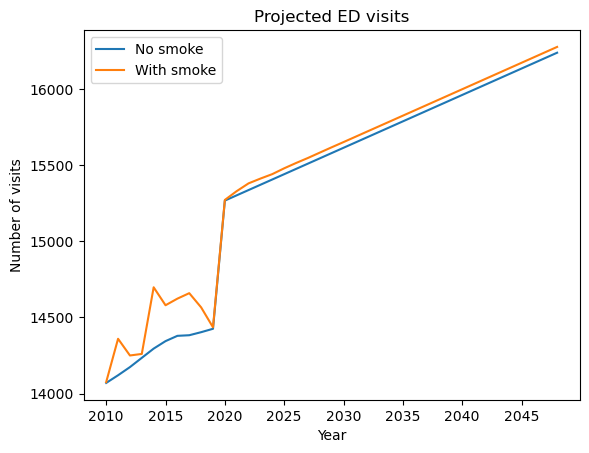

In [20]:
years = []
Totals_no_smoke = []
Totals_with_smoke = []

for year in ED_visits_no_smoke.keys():
    years.append(year)
    Totals_no_smoke.append(ED_visits_no_smoke[year]["total"])
    Totals_with_smoke.append(ED_visits_no_smoke[year]["total"] + ED_visits_with_smoke[year]["Diff_total"])
plt.plot(years, Totals_no_smoke, label="No smoke")
plt.plot(years, Totals_with_smoke, label="With smoke")
plt.title("Projected ED visits")
plt.xlabel("Year")
plt.ylabel("Number of visits")
plt.legend()

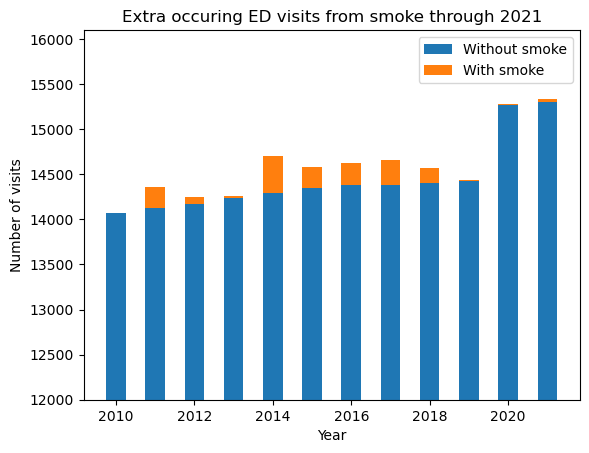

In [21]:
years = []
EDvisits1 = []
EDvisits2 = []
#print(ED_visits_with_smoke)
for year in ED_visits_no_smoke.keys():
    years.append(year)
    EDvisits1.append(ED_visits_no_smoke[year]["total"])
    EDvisits2.append(ED_visits_with_smoke[year]["Diff_total"])
    if(year == 2021): break
    
weight_counts = {
    "Without smoke": np.array(EDvisits1),
    "With smoke": np.array(EDvisits2)
}
width = 0.5

fig, ax = plt.subplots()
bottom = np.zeros(len(years))
for boolean, weight_count in weight_counts.items():
    p = ax.bar(years, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count
ax.set_title("Extra occuring ED visits from smoke through 2021")
ax.set_xlabel("Year")
ax.set_ylabel("Number of visits")
ax.legend(loc="upper right")
ax.ticklabel_format(style='plain', useOffset=False, axis='y')
ax.set_ylim(12000)
plt.show()

# Show projected costs of ED visits vs projected healthcare enrollment
https://hcup-us.ahrq.gov/reports/statbriefs/sb268-ED-Costs-2017.jsp - 530 per ED visit

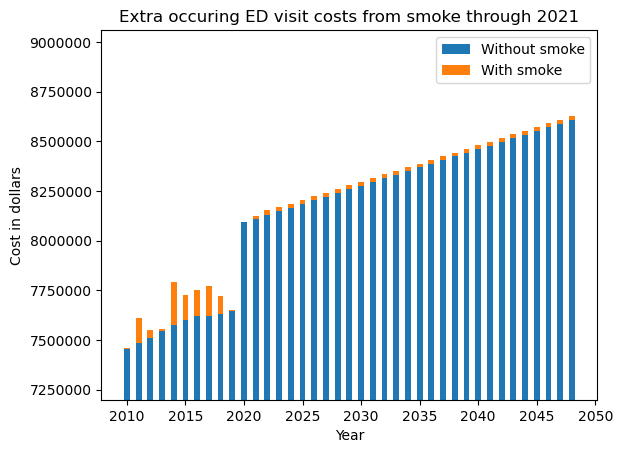

In [22]:
years = []
costs1 = []
costs2 = []
#print(ED_visits_with_smoke)
for year in ED_visits_no_smoke.keys():
    years.append(int(year))
    costs1.append((ED_visits_no_smoke[year]["total"]) * 530)
    costs2.append((ED_visits_with_smoke[year]["Diff_total"]) * 530)
    
    #if(year == 2021): break

weight_counts = {
    "Without smoke": np.array(costs1),
    "With smoke": np.array(costs2)
}
width = 0.5

fig, ax = plt.subplots()
bottom = np.zeros(len(years))
for boolean, weight_count in weight_counts.items():
    p = ax.bar(years, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count
ax.set_title("Extra occuring ED visit costs from smoke through 2021")
ax.set_xlabel("Year")
ax.set_ylabel("Cost in dollars")
ax.legend(loc="upper right")
ax.ticklabel_format(style='plain', useOffset=False, axis='y')
ax.set_ylim(7200000)
plt.show()

# Analyze health care workers per projected ED visit?

In [23]:
#print(EmploymentInfo)
healthcareworkercounts = []
healthcareworkerInfo = {}
for year in EmploymentInfo.keys():
    healthcareworkercounts.append(EmploymentInfo[year]['Employed_estimate_healthcare_education_socialworkers'])
    healthcareworkerInfo[int(year)] = EmploymentInfo[year]['Employed_estimate_healthcare_education_socialworkers']

#print("Healthcare workers estimate forecasting: ")
model = statsmodels.tsa.arima.model.ARIMA(healthcareworkercounts).fit()
predictions = model.predict(start=60, end=88)
#print(model.summary())
year = 2022
for pred in predictions:
    #print("Year:", year, "Predicted:", pred)
    #smoke_real_and_projected[year] = pred
    healthcareworkerInfo[year] = pred
    year += 1

print(healthcareworkerInfo)
#print(ED_visits_with_smoke)
years = []
ratios = []
for year in healthcareworkerInfo.keys():
    years.append(year)
    ratios.append(healthcareworkerInfo[year] / (ED_visits_no_smoke[int(year)]["total"] + ED_visits_with_smoke[int(year)]["Diff_total"]))
plt.plot(years, ratios)
plt.title("Health care workers per ED visit")
plt.xlabel("Year")
plt.ylabel("Ratio")

NameError: name 'EmploymentInfo' is not defined